## Module 11: Power
We've talked about a Type I error, rejecting the null hypothesis when it's true. We've structured our hypothesis test so that the probability of this happening is small. The other kind of error we could make is to fail to reject when the alternative is true (Type II error). Or we might think about the probability of rejecting the null when it is false. This is called Power = 1 - Type II error. We don't have as much control over this probability, since we've spent all of our flexibility guaranteeing that the Type I error rate is small.

One avenue for the control of power is at the design phase. There, assuming our finances let us, we can pick a large enough sample size so that we'd be likely to reject if the alternative is true. Thus the most frequent use of power is to help us design studies.

### 11-01: Power
- **Power** is the probability of rejecting $H_{0}$ when it is false
- A **Type II error** (a bad thing, as its name would suggest) is failing to reject the null hypothesis when it's false; the probability of a type II error is usually called $\beta$
- Power = 1 - $\beta$

**Notes**

- Consider our previous example involving RDI
- $H_{0}: \mu = 30$ versus $H_a: \mu > 30$
- Then power is  
$P \left( \frac{\bar{X} - 30}{s / \sqrt{n} } > t_{1 - \alpha, n - 1}; \mu - \mu_{a} \right) $
- Note that this is a function that depends on the specific value of $\mu_{a}$ !
- Notice as $\mu_{a}$ approaches 30, the power approache $\alpha$

### 11-02: Calculating Power for Gaussian data

- We reject if $\frac{\bar{X} - 30}{s / \sqrt{n} } > z_{1-\alpha}$
- Equivalently if $\bar{X} > 30 + Z_{1-\alpha} \frac{\sigma}{\sqrt{n}}$
- Under $H_{0}: \bar{X} \sim \mathcal{N}(\mu_{0}, \sigma^{2} / n)$, $H_a: \bar{X} \sim \mathcal{N} (\mu_{a}, \sigma^{2} / n )$

*Example*  
$\mu_{0} = 30, \mu_{a} = 32, n = 16, \sigma = 4$

In [22]:
mu0 = 30
mua = 32
sigma = 4
n = 16
alpha = 0.05
z <- qnorm(1 - alpha)
pnorm(mu0 + z * sigma / sqrt(n)
      , mean = mu0
      , sd = sigma / sqrt(n)
      , lower.tail = FALSE
     )

[1] 0.05

In [23]:
pnorm(mu0 + z * sigma / sqrt(n)
      , mean = mua
      , sd = sigma / sqrt(n)
      , lower.tail = FALSE
     )

[1] 0.63876

So there's a 64% probability of detecting a mean as large as 32, or larger if we conduct this experiment

### 11-03: Notes on power
- When testing $H_a: \mu > mu_0$, notice if power is $1-\beta$, then  
$1 - \beta = P \left( \bar{X} > \mu_{0} + z_{1-\alpha} \frac{\sigma}{\sqrt{n}}; \mu = \mu_{a} \right)$
- where $\bar{X} \sim \mathcal{N} \left( \mu_a, \sigma^2 / n \right)$
- Unknowns: $\mu_a$, $\sigma$, $n$, $\beta$
- Knowns: $\mu_0$, $\alpha$
- Specify any 3 of the unknowns and you can solve for the remainder


**Notes**
- The calculation for $H_a: \mu < \mu_0$ is similar
- For $H_a : \mu \neq \mu_0$ calculate the one sided power using $\alpha/2$ (this is only approximately right, it excludes the probabily of getting a large TS in the opposite direction of the truth)
- Power goes up as $\alpha$ gets larger
- Power of a one sided test is greater than the power of the associated two sided test
- Power goes up as $\mu_a$ gets further away from $\mu_0$
- Power goes up as $n$ goes up

**Notes**
Power doesn't need $\mu_a$, $\sigma$ and $n$, instead only $\frac{\sqrt{n} \left( \mu_a - \mu_0 \right)}{\sigma}$
- The quantity $\frac{\left( \mu_a - \mu_0 \right)}{\sigma}$ is called the **effect size**, the difference in the means in standard deviation units
    - Being unit free, the effect size has some hope for interpretability across settings

### 11-04: T test power
- Consider calculating power for a T test for our example
- The power is   
$1 - \beta = P \left( \frac{\bar{X} - \mu_{0}}{S / \sqrt{n}} > t_{1-\alpha, n-1}; \mu = \mu_{a} \right)$
- Calculating this requires the non-central t distribution
- power.t.test does this very well
    - Omit one of the arguments and it solves for it  

*Example*

## ?power.t.test

*Example*: calculate power

In [6]:
power.t.test(n = 16
             , delta = 2/4
             , sd = 1
             , type = 'one.sample'
             , alt = 'one.sided'
            )$power

[1] 0.6040329

In [8]:
power.t.test(n = 16
             , delta = 2
             , sd = 4
             , type = 'one.sample'
             , alt = 'one.sided'
            )$power

[1] 0.6040329

In [9]:
power.t.test(n = 16
             , delta = 100
             , sd = 200
             , type = 'one.sample'
             , alt = 'one.sided'
            )$power

[1] 0.6040329

*Example*: calculate sample size

In [14]:
power.t.test(power = 0.8
             , delta = 2/4
             , sd = 1
             , type = 'one.sample'
             , alt = 'one.sided'
            )$n

[1] 26.13751

In [13]:
power.t.test(power = 0.8
             , delta = 2
             , sd = 4
             , type = 'one.sample'
             , alt = 'one.sided'
            )$n

[1] 26.13751

In [17]:
#help(pnorm)

### Module 12: Multiple Comparisons

**Key ideas**
- Hypothesis testing / significance analysis is commonly overused
- Correcting for multiple testing avoids false posittives or discoveries
- 2 key components
    - Error measure
    - Correction
    
**Types of errors**

|  ()  | $\beta$ = 0 | $\beta \neq$ 0 | HYPOTHESES |  
| ----| ---- | ---- | ---- |
|  Claim $\beta = 0$  | U | T | m-R |
|  Claim $\beta \neq 0$  | V | S | R |
|  Claims  | $m_0$ | $m-m_0$ | m |
- **Type I error of false positive (V)** say that the parameter does not equal zero when it does
- **Type II error of false negative (T)** say that the parameter equals zero when it doesn't

|  ()  | Null is true  | Alt is true  | Total |  
| --------| -------- | -------- | -------- |  
|  Declared significant  | V | S | R |
| Declared non-significant | U | T | m-R|
| Total | $m_{0}$ | $m-m_0$ | m |
- $m_0$ is the number of true null hypotehssi parameter
- $R$ is an obervable random variable, while $S, T, U, V$ are unobservable random variable

Suppose we've tested m null hypotheses, m_0 of which are actually true, and m-m_0 are actually false. Out of the m tests R have been declared significant, that is, the associated p-values were less than alpha, and m-R were nonsignificant, or boring results.

**Error Rates**
- **False positve rate**: the rate at which false results ($\beta = 0$) are called significant: $E \left[ \frac{V}{m_{0}} \right]$
    - The false positive rate is closely related to the Type I error rate
- **Faminly wise error rate (FWER)**: The probability of at least one false positive Pr(V $\ge$ 1)
    - Suppose we're really smart, calculate our p-values correctly, and declare all tests with $p < alpha$ as significant. This means that our false positive rate is at most $\alpha$, on average.
- **False discovery rate (FDR)**: The rate at which claims of significance are false $E \left[ \frac{V}{R} \right]$
    - FDR is the most popular correction when performing lots of tests. It's used in lots of areas such as genomics, imaging, astronomy, and other signal-processing disciplines

**Controlling the false positive rate**
- If P-values are correctly calculated calling all $P < \alpha$ significant will control the false positive rate at level $\alpha$ on average
- Problem: Suppose that you perform 10,000 tests and $\beta = 0$ for all of them
- Suppose that you call all $P<0.05$ significant
- The expected number of false positive is: $10,000 \times 0.05$ = 500 false positives
- How do we avoid so many false positives?

#### Controlling family-wise error rate (FWER)  - Bonferroni method
Basic idea:
- Suppose you do $m$ tests
- You want to control FWER at level $\alpha$ so $\text{Pr}(V \ge 1) < \alpha$
- Calculate P-values normally
- Set $\alpha_{\text{FWER}} = \alpha / m$
- Call all P-values less than $\alpha_{\text{FWER}}$ significant

Pros: Easi to calculate, conservative

Cons: May be very conservative

#### Controlling false discovery rate (FDR)  - Benjamini-Hochberg method (BH)
This is the most popular correction when performing lots of tests say in genomics, imagining, astronomy, or other signal-processing disciplines

Basic idea:
- Suppose you do $m$ tests
- You want to control FDR at level $\alpha$ so $E\left[ \frac{V}{R} \right]$
- Calculate P-values normally
- Order the P-values from smallest to largest $P_{(1)}, P_{(2)}, \ldots, P_{(m)}$
- Call any $P_{(i)} \le \alpha \times \frac{i}{m}$ significant

Pros: still pretty easy to calculate, less conservative (mayby much less)

Cons: Allows for more false postives, may behave strangely under dependence

#### Adjusted P-values
- One approach is to adjust the threshold $\alpha$
- A different approach is to calculate "adjusted p-values"
- **They are not p-values anymore**
- But they can be used directly without adjusting $\alpha$

Example:
- Suppose P-values are $P_1, \ldots, P_m$
- You could adjust them by taking $p_{i}^{\text{FWER}} = \max \left( m \times P_{i}, 1 \right)$ for each P-value
- Then if you call all $p_{i}^{\text{FWER}} < \alpha$ significant, you will control the FWER

#### Case Study I: no true positives

In [19]:
set.seed(1010093)
pValues <- rep(NA, 1000)
for (i in 1:1000){
    y <- rnorm(20)
    x <- rnorm(20)
    pValues[i] <- summary(lm(y~x))$coef[2,4]
}

# Controls false positive rate
sum(pValues < 0.05)


[1] 51

In [21]:
# Controls FWER
sum(p.adjust(pValues, method = 'bonferroni') < 0.05)

[1] 0

In [22]:
# Controls FDR
sum(p.adjust(pValues, method = 'BH') < 0.05)

[1] 0

#### Case study II: 50% true positives

In [23]:
set.seed(1010093)
pValues <- rep(NA, 1000)
for (i in 1:1000){
    x <- rnorm(20)
    # First 500 beta = 0, last 500 beta = 2
    if(i <= 500){y <- rnorm(20)}
    else{y <- rnorm(20, mean = 2*x)}
    pValues[i] <- summary(lm(y~x))$coef[2,4]
}
trueStatus <- rep(c("zero", "not zero"), each = 500)
table(pValues < 0.05, trueStatus)

       trueStatus
        not zero zero
  FALSE        0  476
  TRUE       500   24

In [25]:
# Controls FWER
table(p.adjust(pValues, method = 'bonferroni') < 0.05, trueStatus)

       trueStatus
        not zero zero
  FALSE       23  500
  TRUE       477    0

In [27]:
# Controls FDR
table(p.adjust(pValues, method = 'BH') < 0.05, trueStatus)

       trueStatus
        not zero zero
  FALSE        0  487
  TRUE       500   13

#### Notes
- Multiple testing is an entire subfield
- A basic Bonferroni/BH correction is usually enough
- If there is strong dependence between tests there may be problems
    - Consider method = "BY"

## Module 13: Resampling

Resampling based procedures are ways to perform population based statistical inferences, while living within our data. Data Scientists tend to really like resampling based inferences, since they are very data centric procedures, they scale well to large studies and they often make very few assumptions.

### 13-01: The Bootstrap  
- **Bootstrap** is a trememdously useful tool for constructing confidence intervals and calculating standard errors for difficult statistics
- e.g. how would one derive a confidence interval for the median?

### 13-02: Example

In [31]:
library(UsingR)
data(father.son)
x <- father.son$sheight
n <- length(x)
B <- 10000
resamples <- matrix(sample(x, n * B, replace = TRUE), B, n)
resampledMedians <- apply(resamples, 1, median)

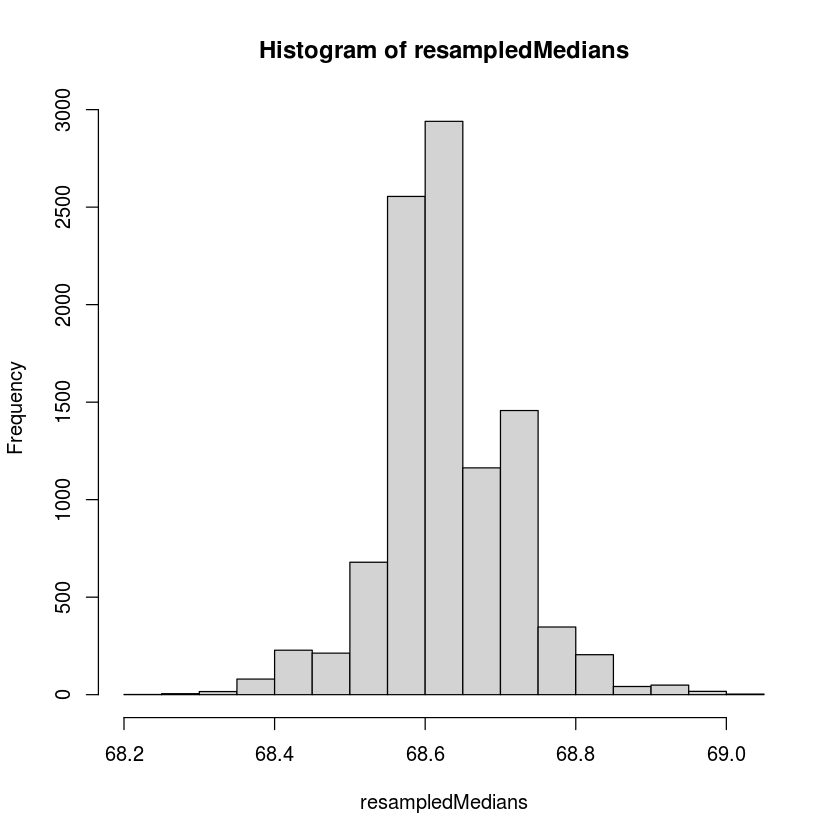

In [38]:
#hist(resampledMedians)
hist(resampledMedians)

### 13-03: Notes on the bootstrap
**The bootstrap principle**

Suppose that I have a statistic that estimates some population parameter, but i don't know its sampling distribution

The bootstrap principle suggests using the distribution defined by the data to approximate its sampling distribution

In practice, the bootstrap principle is always carried out using simulation

- The **general procedure** follows by first simulating data sets from the observed data with replacement
    - This is approximately drawing from the sampling distribution of that statistic, at least as far as the data is able to approximate the true population distribution
- Calculate the statisitc for each simulated data set
- Use the simulated statistic to either define a confidence interval or take the standard deviation to calculate a standard error

#### Nonparametric bootstrap algorithm example

Bootstrap procedure for calculating confidence interval for the median from a data set of $n$ observations
- Sample $n$ observations **with replacement** from the observed data resulting in one simulated complete data set
- Take the median of the simulated data set
- Repeat these two steps B times, resulting in B simulated medians
- These medians are approximately drawn from the sampling distribution of the median of $n$ observations; therefore we can
    - Draw a histogram of them
    - Calculate their standard deviation to estimate the standard error of the mean
    - Take the 2.5th and 97.5th percentiles as a confidence interval for the median

In [41]:
library(UsingR)
data(father.son)
x <- father.son$sheight
n <- length(x)
B <- 10000
resamples <- matrix(sample(x, n * B, replace = TRUE), B, n)
medians <- apply(resamples, 1, median)
sd(medians)

[1] 0.08574471

In [42]:
quantile(medians, c(0.025, 0.975))

2.5%    97.5% 
68.42972 68.81579

In [43]:
quantile(medians)

0%      25%      50%      75%     100% 
68.24471 68.59027 68.61673 68.66534 69.03002

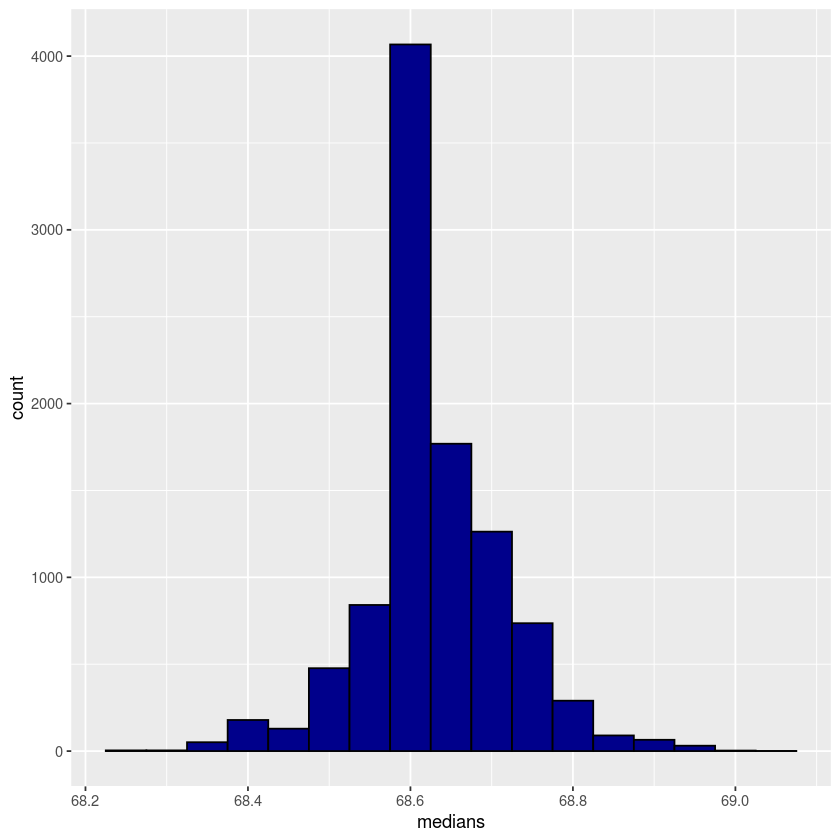

In [46]:
g <- ggplot(data.frame(medians = medians), aes (x = medians))
g <- g + geom_histogram(color = 'black', fill = 'darkblue', binwidth = 0.05)
g

### 13-04: Permutation tests

- Consider the null hypothesis that the distribution of the observations from each group is the same
- Then, the group labels are irrelevant
- Consider a data frame with count and spray
- Permute the spray (group) labels
- Re-calculate the statistic
    - Mean difference in counts
    - Genometric means
    - T statistic
- Calculate the percentage of simulation where the simulated statistic was more extreme (toward the alternative) than the observed
1'22''

In [2]:
difference = c(-8, -3, 1, -2, -5)
t.test(difference, alternative = "two.sided", paird = TRUE)


	One Sample t-test

data:  difference
t = -2.2616, df = 4, p-value = 0.08652
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -7.5739122  0.7739122
sample estimates:
mean of x 
     -3.4 


In [5]:
#help(t.test)
1100+c(-1,1) * qt(0.975, 8) * 30/sqrt(9)

[1] 1076.94 1123.06

In [10]:
pbinom(3, size = 4, prob = 0.75, lower.tail = FALSE)

[1] 0.3164063

In [14]:
pbinom(10, size = 1787, prob = 0.01, lower.tail = TRUE)

[1] 0.031748

In [15]:
poisson.test(x = 10, T = 1787, r = 0.01, alternative = 'less')


	Exact Poisson test

data:  10 time base: 1787
number of events = 10, time base = 1787, p-value = 0.03237
alternative hypothesis: true event rate is less than 0.01
95 percent confidence interval:
 0.000000000 0.009492009
sample estimates:
 event rate 
0.005595971 


In [18]:
bar_x = -3
bar_y = 1
n_x = 9
n_y = 9
s_x = 1.5
s_y = 1.8
sp = (s_x^2 * (n_x - 1) + s_y^2 * (n_y - 1))/(n_x + n_y -2)

In [20]:
pt((bar_x - bar_y)/(sp * sqrt(1/n_x + 1 / n_y)), df = n_x + n_y -2)

[1] 0.003504094

In [21]:
qt(0.95, 8)

[1] 1.859548

In [28]:
power.t.test(n = 100
             , delta = 0.01
             , sd = 0.04
             , type = 'one.sample'
             , alt = 'one.sided'
            )$power

[1] 0.7989855

In [32]:
power.t.test(power = 0.9
             , delta = 0.01
             , sd = 0.04
             , type = 'one.sample'
             , alt = 'one.sided'
            )


     One-sample t test power calculation 

              n = 138.3856
          delta = 0.01
             sd = 0.04
      sig.level = 0.05
          power = 0.9
    alternative = one.sided


In [24]:
?power.t.test

power.t.test {stats},R Documentation
n,number of observations (per group)
delta,true difference in means
sd,standard deviation
sig.level,significance level (Type I error probability)
power,power of test (1 minus Type II error probability)
type,string specifying the type of t test. Can be abbreviated.
alternative,one- or two-sided test. Can be abbreviated.
strict,use strict interpretation in two-sided case
tol,"numerical tolerance used in root finding, the default providing (at least) four significant digits."
